In [53]:
#import necessary library and files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [54]:
#create dataframe
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Data Preprocessing

In [57]:
print("Train df shape: ", train_df.shape)
print("Test df shape: ", test_df.shape)

Train df shape:  (1460, 81)
Test df shape:  (1459, 80)


In [58]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [59]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [60]:
train_df.columns[train_df.isnull().any()]  #they are the columns having null value

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [61]:
test_df.columns[test_df.isnull().any()]    #they are the columns having null value

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [62]:
# filling NaN value with mode or median
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = train_df[column].fillna(train_df[column].mode()[0])
    else:
        train_df[column] = train_df[column].fillna(train_df[column].median())

In [63]:
train_df = pd.get_dummies(train_df)

In [64]:
train_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


### Visualize the relation between the features using heatmap plot

In [65]:
corr_matrix = train_df.corr()
corr_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,-0.051283,0.128995,-0.023074,-0.091864,-0.021725,-0.036570,-0.018040,0.016250,-0.074146,0.127293
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.036570,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011783,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018040,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.016250,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.074146,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


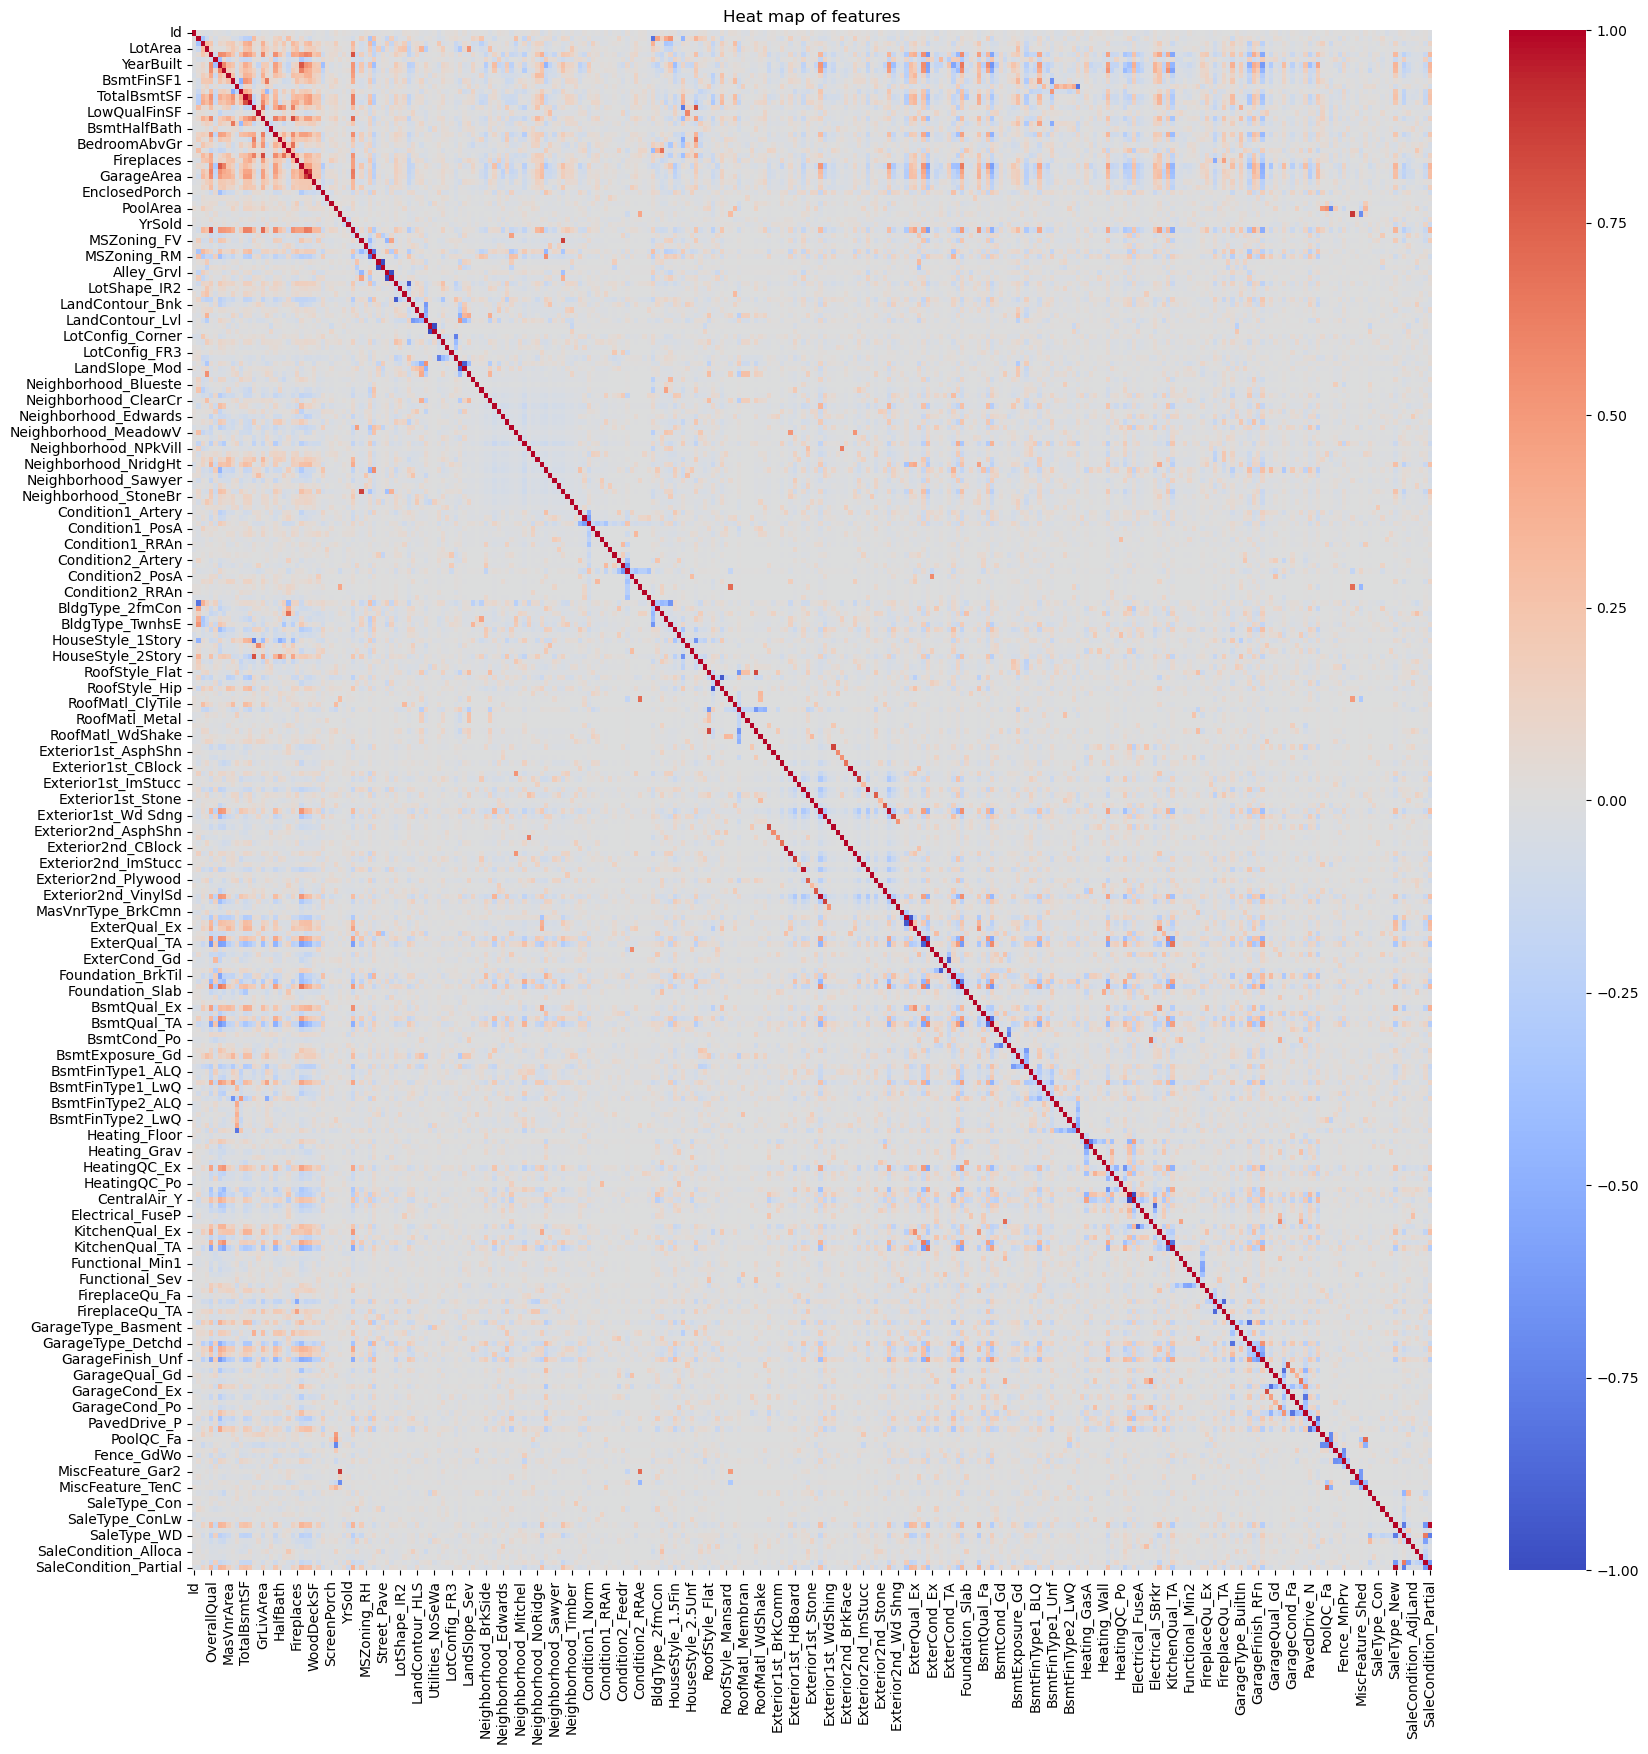

In [66]:
#plot the heat based on correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix,annot=False, cmap='coolwarm', center=0)
plt.title("Heat map of features")
plt.show()

In [67]:
#selecting the feature based on threshold value
threshold = 0.05
selected_features = corr_matrix.index[abs(corr_matrix['SalePrice'])>threshold].tolist()
selected_features.remove("SalePrice")

In [68]:
#Split the data into train and test data
X = train_df[selected_features]
y = np.log(train_df["SalePrice"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 100)

In [69]:
#Train the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Features Importance

In [70]:
model.coef_

array([-4.38907730e-04,  2.16197015e-04,  8.88563412e-07,  3.71690778e-02,
        3.68703713e-02,  1.87731773e-03,  9.73226657e-04, -1.27128820e-06,
       -3.59676966e-05, -7.36843241e-05,  1.47205190e-04,  1.68541693e-04,
        1.26074774e-04,  7.05555591e-05,  3.54991524e-02,  1.59772433e-02,
        1.47803343e-02,  8.08379558e-03, -5.84184588e-02,  1.01527593e-02,
        3.17429345e-02, -2.32070978e-04,  3.18982080e-02,  1.01623446e-04,
        7.90589644e-05,  9.42113468e-06,  1.15461120e-04,  1.95236526e-04,
       -4.83765455e-03, -3.15063733e-01,  1.11977519e-01,  8.99619279e-02,
        7.80666633e-02,  3.50576234e-02, -6.69047305e-02, -4.83447524e-02,
       -6.58199351e-02, -5.64813469e-02, -6.82208906e-03,  3.63335893e-02,
       -6.11873055e-03, -2.95672292e-02, -4.16094065e-02,  5.36306585e-02,
        6.48730066e-02,  9.18851449e-03,  1.65571265e-01, -6.68144670e-02,
        8.81665239e-05, -1.18132777e-01, -3.18863605e-02, -6.72973969e-04,
        7.51691881e-02,  

In [71]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'SaleType_COD',
       'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=175)

In [72]:
features_importance = pd.DataFrame(model.coef_, X.columns, columns=['Co-efficient'])

In [73]:
top_features = features_importance.abs().sort_values(by='Co-efficient', ascending=True)

In [74]:
top_features = top_features.head(10)
top_features

,Co-efficient
LotArea,8.885634e-07
MasVnrArea,1.271288e-06
OpenPorchSF,9.421135e-06
BsmtFinSF1,3.596770e-05
GrLivArea,7.055556e-05
BsmtUnfSF,7.368432e-05
WoodDeckSF,7.905896e-05
Neighborhood_IDOTRR,8.816652e-05
GarageArea,1.016234e-04
EnclosedPorch,1.154611e-04


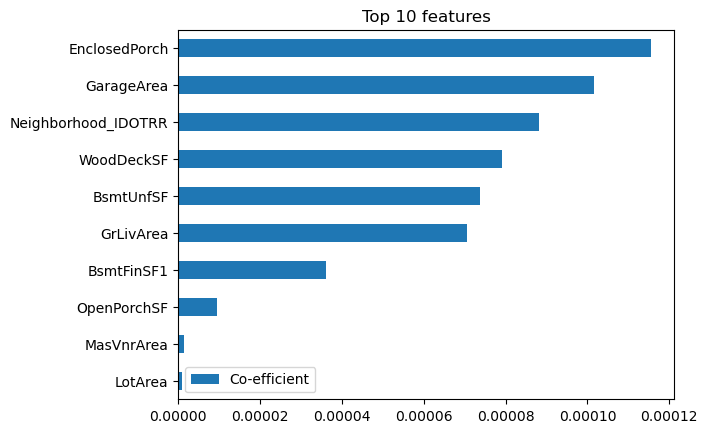

In [75]:
top_features.plot(kind='barh')
plt.title("Top 10 features")
plt.show()

### Model Evaluation

In [76]:
# Predictions for validation set using Linear Regression
Y_predict = model.predict(X_test)

In [77]:
# Ensure that the test data includes all columns used in the model, adding missing ones with a default value of 0
required_columns = X.columns
test_df_all_columns = test_df.reindex(columns=required_columns,fill_value=0)

In [78]:
test_df_all_columns.isnull().sum()

MSSubClass                 0
LotFrontage              227
LotArea                    0
OverallQual                0
OverallCond                0
                        ... 
SaleType_WD                0
SaleCondition_Abnorml      0
SaleCondition_AdjLand      0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 175, dtype: int64

In [79]:
#fill alll the null value with 0
test_df_all_columns.fillna(0,inplace=True)

In [80]:
test_df_all_columns.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleType_WD              0
SaleCondition_Abnorml    0
SaleCondition_AdjLand    0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 175, dtype: int64

In [81]:
# Use the corrected DataFrame for predictions
final_test_df = test_df_all_columns
test_predection = model.predict(final_test_df)

In [82]:
# Convert predictions back from log scale if the target was transformed during training
final_predection = np.exp(test_predection)

In [46]:
final_predection

array([3004720.78143113, 3533616.65940739, 3904464.7461246 , ...,
       4214895.57261861, 4314289.20315822, 4852747.46036025])

In [51]:
# Create and save the submission file
predicted_result = pd.DataFrame({
        "ID" : test_df['Id'],
       "Sales_Price": final_predection
})
predicted_result

,ID,Sales_Price
0,1461,3.004721e+06
1,1462,3.533617e+06
2,1463,3.904465e+06
3,1464,4.235912e+06
4,1465,3.745138e+06
...,...,...
1454,2915,3.860582e+06
1455,2916,2.461341e+06
1456,2917,4.214896e+06
1457,2918,4.314289e+06


In [52]:
predicted_result.to_csv('My Submission.csv', index=False)
print("Wow Task 1 is completed")

Wow Task 1 is completed
